In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

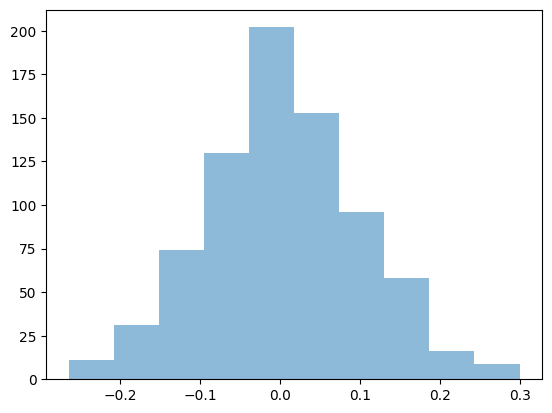

In [17]:
df = pd.read_csv("../syntetic_tests/N_40/Jij/Jij_777.dat", sep=' ')
#df2 = pd.read_csv("../syntetic_tests/N_20/Jij/Jij_20848.dat", sep=' ')
#df3 = pd.read_csv("../syntetic_tests/N_20/Jij/Jij_66544.dat", sep=' ')

plt.hist(df["Jij_synt"],alpha=0.5)
#plt.hist(df2["Jij_synt"],alpha=0.5)
#plt.hist(df3["Jij_synt"],alpha=0.5)
plt.show()

1000 estados, 40 spins


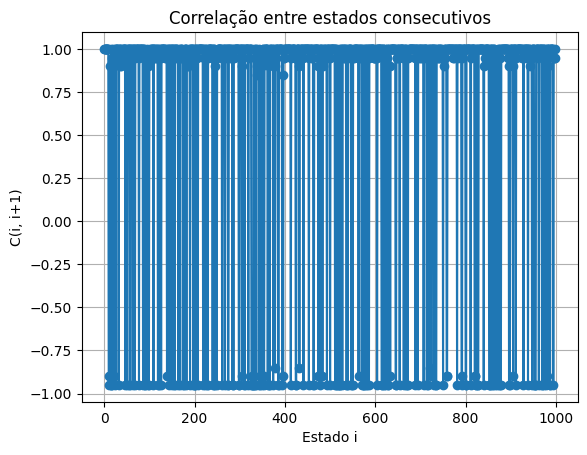

Correlação média entre estados consecutivos: 0.6156
Número efetivo de amostras independentes (ESS) com janela Sokal: 226.5 de um total de 1000 estados.
Truncamento da soma ocorreu em tau = 8.


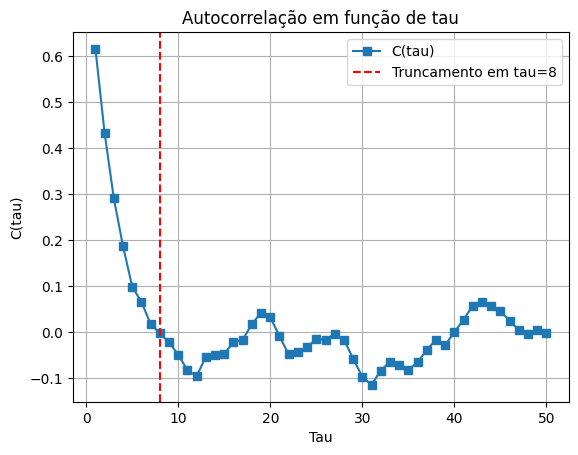

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- CONFIGURAÇÃO ---
# Carregar dados
data = np.loadtxt("../syntetic_tests/N_60/data_771.dat", delimiter=",", skiprows=1)

num_states, num_spins = data.shape
print(f"{num_states} estados, {num_spins} spins")

# --- 1. Correlação entre estados consecutivos ---
corr_consecutiva = []

for i in range(num_states - 1):
    ci = np.dot(data[i], data[i + 1]) / num_spins
    corr_consecutiva.append(ci)

plt.plot(corr_consecutiva, marker='o')
plt.xlabel("Estado i")
plt.ylabel("C(i, i+1)")
plt.title("Correlação entre estados consecutivos")
plt.grid(True)
plt.show()

print(f"Correlação média entre estados consecutivos: {np.mean(corr_consecutiva):.4f}")

# --- 2. Tempo de autocorrelação para diferentes tau ---
max_tau = min(50, num_states - 1)  # Limita tau para evitar problemas

C_tau = []
taus = np.arange(1, max_tau + 1)

for tau in taus:
    C = []
    for i in range(num_states - tau):
        c = np.dot(data[i], data[i + tau]) / num_spins
        C.append(c)
    C_tau.append(np.mean(C))

C_tau = np.array(C_tau)

# --- 3. Estimativa do número efetivo de amostras independentes (ESS) com janela Sokal ---

sum_C = 0.0
trunc_tau = None  # Onde vamos cortar o somatório

for i in range(len(C_tau)):
    if C_tau[i] > 0:
        sum_C += C_tau[i]
    else:
        trunc_tau = taus[i]
        break

if trunc_tau is None:
    trunc_tau = max_tau  # Se nunca encontrou valor negativo, considera todo o range

n_eff = num_states / (1 + 2 * sum_C)

print(f"Número efetivo de amostras independentes (ESS) com janela Sokal: {n_eff:.1f} de um total de {num_states} estados.")
print(f"Truncamento da soma ocorreu em tau = {trunc_tau}.")

# --- 4. Gráfico da autocorrelação com janela de truncamento ---
plt.plot(taus, C_tau, marker='s', label="C(tau)")
plt.axvline(trunc_tau, color='red', linestyle='--', label=f"Truncamento em tau={trunc_tau}")
plt.xlabel("Tau")
plt.ylabel("C(tau)")
plt.title("Autocorrelação em função de tau")
plt.grid(True)
plt.legend()
plt.show()
